# Telecom Churn Case Study

## 1. Import Libraries and Read Data File

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read csv file
telecom_initial = pd.read_csv('telecom_churn_data.csv', low_memory=False)
pd.set_option('display.max_rows', None)

In [3]:
# get the head of dataset
telecom_initial.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
# get the info of dataset
telecom_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# get dataset shape
telecom_initial.shape

(99999, 226)

In [6]:
# get the percentage to missing values
telecom_initial.isnull().mean().round(4).mul(100).sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [7]:
# create a copy of original dataset for further analysis
telecom = telecom_initial.copy()

### 2. Treating Categorical Variables
There are 8 following categorical variables.
* night_pck_user_6
* night_pck_user_7
* night_pck_user_8
* night_pck_user_9
* fb_user_6
* fb_user_7
* fb_user_8
* fb_user_9

These columns have more than 60% of null values, we can impute the missing values with -1 where -1 can be treated as new category

In [8]:
# Missing values can be imputed with '-1' 
# where -1 can be treated as a new category.

categorical_vars = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9", 
                    "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]

for var in categorical_vars:
    telecom[var].fillna(value=-1, inplace=True)

In [9]:
# Create dummy variables for all the six categorial variables
night_pck_user_6_s = pd.get_dummies(telecom['night_pck_user_6'],prefix="night6",drop_first=True)
night_pck_user_7_s = pd.get_dummies(telecom['night_pck_user_7'],prefix="night7",drop_first=True)
night_pck_user_8_s = pd.get_dummies(telecom['night_pck_user_8'],prefix="night8",drop_first=True)

fb_user_6_s = pd.get_dummies(telecom['fb_user_6'],prefix="fb6", drop_first=True)
fb_user_7_s = pd.get_dummies(telecom['fb_user_7'],prefix="fb7",drop_first=True)
fb_user_8_s = pd.get_dummies(telecom['fb_user_8'],prefix="fb8",drop_first=True)

telecom = pd.concat([telecom,night_pck_user_6_s],axis=1)
telecom = pd.concat([telecom,night_pck_user_7_s],axis=1)
telecom = pd.concat([telecom,night_pck_user_8_s],axis=1)

telecom = pd.concat([telecom,fb_user_6_s],axis=1)
telecom = pd.concat([telecom,fb_user_7_s],axis=1)
telecom = pd.concat([telecom,fb_user_8_s],axis=1)

# drop all categorial columns
telecom = telecom.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8'], 1)

### 3. Missing Value Treatment
1. Delete: Delete the missing values 
2. Impute: 
    - Imputing by a simple statistic: Replace the missing values by another value, commonly the mean, median, mode etc. 
    - Predictive techniques: Use statistical models such as k-NN, SVM etc. to predict and impute missing values

In [10]:
# summing up the missing values (column-wise)
telecom.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [11]:
# Percentage of missing values (column-wise) where missing values are more than 70%
colmns_missing_data = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
colmns_missing_data[colmns_missing_data >= 70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

In [12]:
# Treat missing values
# Columns used for filtering high-value customers, can't be dropped
# total_rech_data_6 
# total_rech_data_7 
# av_rech_amt_data_6 
# av_rech_amt_data_7 

# All these columns has more than 70% missing values

print(telecom.total_rech_data_6.describe());
print();
print(telecom.total_rech_data_7.describe());
print()
print(telecom.av_rech_amt_data_6.describe());
print()
print(telecom.av_rech_amt_data_7.describe());

count    25153.000000
mean         2.463802
std          2.789128
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         61.000000
Name: total_rech_data_6, dtype: float64

count    25571.000000
mean         2.666419
std          3.031593
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         54.000000
Name: total_rech_data_7, dtype: float64

count    25153.000000
mean       192.600982
std        192.646318
min          1.000000
25%         82.000000
50%        154.000000
75%        252.000000
max       7546.000000
Name: av_rech_amt_data_6, dtype: float64

count    25571.000000
mean       200.981292
std        196.791224
min          0.500000
25%         92.000000
50%        154.000000
75%        252.000000
max       4365.000000
Name: av_rech_amt_data_7, dtype: float64


(array([1.4539e+04, 8.0550e+03, 1.8810e+03, 4.6500e+02, 3.0400e+02,
        1.4100e+02, 4.4000e+01, 4.4000e+01, 3.8000e+01, 1.3000e+01,
        1.3000e+01, 1.0000e+01, 7.0000e+00, 6.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.00000e-01, 1.75080e+02, 3.49660e+02, 5.24240e+02, 6.98820e+02,
        8.73400e+02, 1.04798e+03, 1.22256e+03, 1.39714e+03, 1.57172e+03,
        1.74630e+03, 1.92088e+03, 2.09546e+03, 2.27004e+03, 2.44462e+03,
        2.61920e+03, 2.79378e+03, 2.96836e+03, 3.14294e+03, 3.31752e+03,
        3.49210e+03, 3.66668e+03, 3.84126e+03, 4.01584e+03, 4.19042e+03,
        4.36500e+03]),
 <BarContainer object of 25 artists>)

<Figure size 432x288 with 0 Axes>

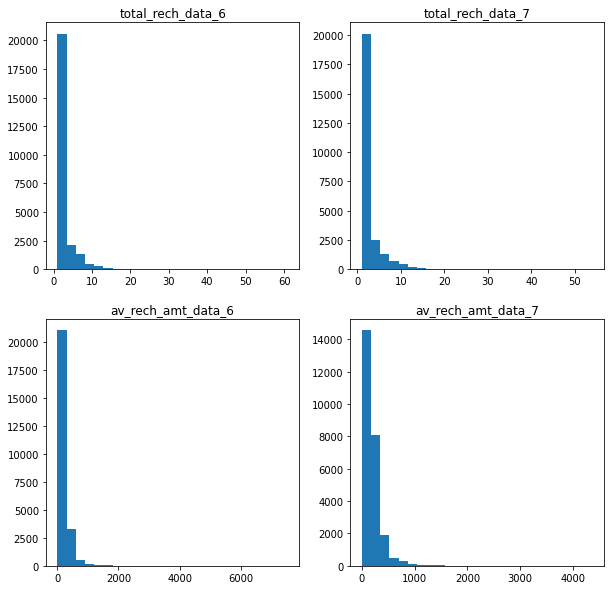

In [13]:
# plot histogram to check the distribution
# total_rech_data_6
plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("total_rech_data_6")
plt.hist(telecom.total_rech_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,2,2)
plt.title("total_rech_data_7")
plt.hist(telecom.total_rech_data_7.dropna(),bins=25)

# av_rech_amt_data_6
plt.subplot(2,2,3)
plt.title("av_rech_amt_data_6")
plt.hist(telecom.av_rech_amt_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,2,4)
plt.title("av_rech_amt_data_7")
plt.hist(telecom.av_rech_amt_data_7.dropna(),bins=25)

In [14]:
# Variables are numeric and distribution resemble the 'power law'. 
# The minimum value is 1, and not zero, 
# The rows with missing values also have the 'dates of recharge' columns 
# missing -- indicating that no recharge was done in this month. 
# Thus, missing values can be imputed with 0.

telecom.total_rech_data_6.fillna(value=0, inplace=True)
telecom.total_rech_data_7.fillna(value=0, inplace=True)
telecom.total_rech_data_8.fillna(value=0, inplace=True)
telecom.total_rech_data_9.fillna(value=0, inplace=True)

telecom.av_rech_amt_data_6.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_7.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_8.fillna(value=0, inplace=True)
telecom.av_rech_amt_data_9.fillna(value=0, inplace=True)

In [15]:
# Column analysis % of missing values
print(round(100*(telecom.isnull().sum()/len(telecom.index)), 2));
print()

# Columns with more than 70% missing values
colmns_missing_data = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
print(colmns_missing_data[colmns_missing_data >= 70])

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [16]:
# drop columns where missing values are greater than 70%
drop_missing_values_columns = colmns_missing_data[colmns_missing_data > 70].index
telecom.drop(drop_missing_values_columns, axis=1, inplace=True)

print('Number of columns droped here  = ', len(drop_missing_values_columns))
print('Dataframe Shape: ', telecom.shape)

Number of columns droped here  =  24
Dataframe Shape:  (99999, 208)


### 4. Filter High-Value Customers

In [17]:
# New DERIVED Columns for Total Data Recharge Amount

telecom["total_rech_data_amt_6"] = telecom["total_rech_data_6"]*telecom['av_rech_amt_data_6']
telecom["total_rech_data_amt_7"] = telecom["total_rech_data_7"]*telecom['av_rech_amt_data_7']
telecom["total_rech_data_amt_8"] = telecom["total_rech_data_8"]*telecom['av_rech_amt_data_8']
telecom["total_rech_data_amt_9"] = telecom["total_rech_data_9"]*telecom['av_rech_amt_data_9']

# We can drop total_rech_data_* and av_rech_amt_data_*
drop_data_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
telecom.drop(drop_data_columns, axis=1, inplace=True)

In [18]:
# Filter high-value customers
avg_rech_amt_6_7 = (telecom["total_rech_amt_6"] + telecom["total_rech_data_amt_6"] + 
                      telecom["total_rech_amt_7"] + telecom["total_rech_data_amt_7"]) / 2.0
amont_70_pc = np.percentile(avg_rech_amt_6_7, 70.0)
print('70 percentile of first two months avg recharge amount: ', amont_70_pc)

telecom = telecom[avg_rech_amt_6_7 >= amont_70_pc]
print('Dataframe Shape: ', telecom.shape)

70 percentile of first two months avg recharge amount:  478.0
Dataframe Shape:  (30001, 204)


### 4. Identify Curn & Tag Churners

In [19]:
# Identify Churn
X = telecom["total_ic_mou_9"] + telecom["total_og_mou_9"] + telecom["vol_2g_mb_9"] + telecom["vol_3g_mb_9"]
telecom["churn"] = np.where(X, 0, 1)
#telecom["churn"].head(10)

# Columns to be dropped: all columns ending with "_9"
drop_fourth_month_columns = [hdr for hdr in list(telecom) if hdr.endswith("_9")]
drop_fourth_month_columns += ["sep_vbc_3g"]
telecom.drop(drop_fourth_month_columns, axis=1, inplace=True)

print('Number of columns droped here  = ', len(drop_fourth_month_columns))
print('Dataframe Shape: ', telecom.shape);

Number of columns droped here  =  48
Dataframe Shape:  (30001, 157)


### 5. Identify columns that have no varience & Drop

In [20]:
# Identify columns that have no varience
telecom_unique_count = telecom.nunique().sort_values(ascending=False)
#print("Dataframe Unique Values: \n", telecom_unique_count); print_ln()

# Identify bad colums that has no infromation (all entries are NA or same)
# Find columns with all NULL entries and add to drop_columns list
telecom_unique_count_is_zero = telecom_unique_count[telecom_unique_count == 0]
print("Dataframe Unique Value Count is ZERO (all null values): \n", telecom_unique_count_is_zero);
print()
drop_no_varience_columns = list(telecom_unique_count_is_zero.index)

# Find columns with all same entries and add to drop_columns list
telecom_unique_count_is_one = telecom_unique_count[telecom_unique_count == 1]
print("Dataframe Unique Value Count is ONE (all same values): \n", telecom_unique_count_is_one);
print()
drop_no_varience_columns += list(telecom_unique_count_is_one.index)

telecom.drop(drop_no_varience_columns, axis=1, inplace=True)

print('Dataframe Shape: ', telecom.shape);
print('Number of columns dropped here  = ', len(drop_no_varience_columns))
print('Dataframe Shape: ', telecom.shape);

Dataframe Unique Value Count is ZERO (all null values): 
 Series([], dtype: int64)

Dataframe Unique Value Count is ONE (all same values): 
 last_date_of_month_7    1
circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
std_ic_t2o_mou_6        1
last_date_of_month_8    1
std_ic_t2o_mou_7        1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_ic_t2o_mou_8        1
dtype: int64

Dataframe Shape:  (30001, 144)
Number of columns dropped here  =  13
Dataframe Shape:  (30001, 144)


In [21]:
telecom.head(5) 

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,...,0,1,0,1,0,1,252.0,252.0,252.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0,0,0,0.0,0.0,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,0,0,1,0,1,0.0,354.0,207.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0,0,0,0,0.0,0.0,0.0,0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,0,0,0,1,0,1,0.0,712.0,540.0,0


### 6. Missing values in rows

In [22]:
# sum it up to check how many rows have all missing values
print("Rows with all NULL values =",  telecom.isnull().all(axis=1).sum())

# sum of misisng values in each row
rows_missing_data = telecom.isnull().sum(axis=1)
rows_missing_data[rows_missing_data > 0]

Rows with all NULL values = 0


0        54
77       27
91        1
111      27
188      28
191       1
358      27
364      27
414      28
423      27
527      27
539      54
588       1
603       2
679       1
687      82
690      28
723      28
788      27
845      28
895      27
933      27
934      27
1138     54
1255     27
1374      1
1489     54
1500     55
1524     28
1555     56
1623     27
1754     27
1768     27
1877     27
1913      1
1952     28
2063     27
2185     81
2197     28
2218     55
2285     81
2352     28
2452     27
2516     54
2533     27
2572     27
2719     27
2750     27
2777      1
3154     81
3289     54
3290     81
3310     27
3364     27
3416     27
3444     54
3468     81
3511     27
3523     55
3543     27
3564     27
3667     28
3696     27
3719     27
3734     27
3754     54
3757      1
3854     28
3865     28
3878     27
4190     83
4284      1
4402     27
4414     28
4439     27
4810     28
4814      1
4820     54
4838     81
4934      1
4960     29
4996     27
5025     27
5074

In [23]:
# small percentage of rows has more than or equal to 27 missing values
drop_rows = telecom.isnull().sum(axis=1) >= 27
print("Number of rows with >= 27 missing values = {}".format(drop_rows.sum()))
print("     % of rows with >= 27 missing values = {} %".format(drop_rows.sum()/telecom.shape[0]*100))

# drop rows with missing values greater >= 27
telecom = telecom[telecom.isnull().sum(axis=1) < 27]
print('Dataframe Shape after dropping rows: ', telecom.shape);

Number of rows with >= 27 missing values = 1497
     % of rows with >= 27 missing values = 4.989833672210926 %
Dataframe Shape after dropping rows:  (28504, 144)


In [24]:
rows_missing_data = telecom.isnull().sum(axis=1)
print(rows_missing_data[rows_missing_data > 0])

91       1
191      1
588      1
603      2
679      1
1374     1
1913     1
2777     1
3757     1
4284     1
4814     1
4934     1
5187     1
5449     1
5798     1
5926     1
7304     1
7399     1
7567     1
7662     1
7914     1
8118     1
8159     1
8281     1
8454     1
8680     1
8979     1
9012     1
9027     1
9068     1
9086     1
9116     1
9365     1
9773     1
9807     1
10238    1
10386    1
10863    1
10869    1
11117    1
11550    1
11812    1
11954    1
12127    1
12414    1
12428    1
12522    1
12635    1
12701    1
12897    1
13012    1
13764    1
13837    1
14039    2
14920    1
15318    1
15648    2
15972    1
16195    1
16365    1
17020    1
17070    1
17121    1
17386    1
18016    1
18154    1
18546    1
18855    1
18908    1
20503    1
20541    1
20628    1
20729    1
21142    1
21468    1
21537    1
21753    1
21857    1
21923    1
22097    1
22118    1
22158    1
22229    1
23456    1
23795    1
23862    1
24490    1
24823    1
25091    1
25215    1
25540    1

### Fix Dates & convert to meaningful numbers
1. Convert date_of_last_rech_6 --> rech_b4_days_to_month_end_6 (voice rechanrged before number of days to month end)
2. convert date_of_last_rech_data_6 --> rech_b4_days_to_month_end_data_6 (data rechanrged before number of days to month end)

In [25]:
# covert date columns to python datetime format
date_vars = ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8"]
telecom[date_vars].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,6/27/2014,7/25/2014,8/26/2014
8,6/25/2014,7/31/2014,8/30/2014
21,6/30/2014,7/31/2014,8/31/2014
23,6/18/2014,7/7/2014,8/24/2014
33,6/30/2014,7/30/2014,8/26/2014


In [26]:
# convert to datetime
for col in date_vars:
    telecom[col] = pd.to_datetime(telecom[col])

print(telecom[date_vars].info())
telecom[date_vars].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_of_last_rech_6  28471 non-null  datetime64[ns]
 1   date_of_last_rech_7  28452 non-null  datetime64[ns]
 2   date_of_last_rech_8  28228 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 890.8 KB
None


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,2014-06-27,2014-07-25,2014-08-26
8,2014-06-25,2014-07-31,2014-08-30
21,2014-06-30,2014-07-31,2014-08-31
23,2014-06-18,2014-07-07,2014-08-24
33,2014-06-30,2014-07-30,2014-08-26


In [27]:
# Create new days columns, instead of date
import datetime
last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

telecom["rech_days_left_6"]      = (last_date_of_month_6 - telecom.date_of_last_rech_6).astype('timedelta64[D]')
telecom["rech_days_left_7"]      = (last_date_of_month_7 - telecom.date_of_last_rech_7).astype('timedelta64[D]')
telecom["rech_days_left_8"]      = (last_date_of_month_8 - telecom.date_of_last_rech_8).astype('timedelta64[D]')

day_columns = ["rech_days_left_6", "rech_days_left_7", "rech_days_left_8"]
#print(telecom[day_columns].head(10))
print(telecom[day_columns].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rech_days_left_6  28471 non-null  float64
 1   rech_days_left_7  28452 non-null  float64
 2   rech_days_left_8  28228 non-null  float64
dtypes: float64(3)
memory usage: 890.8 KB
None


In [28]:
# Drop all old date columns: add dates columns to drop_column list
telecom.drop(date_vars, axis=1, inplace=True)
telecom1 = telecom.copy()

print('Number of columns droped here  = ', len(date_vars))
print('Dataframe Shape: ', telecom.shape)

Number of columns droped here  =  3
Dataframe Shape:  (28504, 144)


In [29]:
# Missing Values Treatment: continue
# look at the COLUMN summary again
df = round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
df[df > 0]

rech_days_left_6    0.12
rech_days_left_7    0.18
rech_days_left_8    0.97
dtype: float64

In [30]:
telecom[['rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8']].describe()

,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,28471.000000,28452.000000,28228.000000
mean,3.388044,3.486504,4.147478
std,4.490864,4.289200,5.104752
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,2.000000,2.000000,3.000000
75%,4.000000,5.000000,6.000000
max,29.000000,30.000000,30.000000


In [31]:
# Mean & Median are different: imputing with median value for recharge days left 
telecom.loc[np.isnan(telecom['rech_days_left_6']), ['rech_days_left_6']] = telecom['rech_days_left_6'].median()
telecom.loc[np.isnan(telecom['rech_days_left_7']), ['rech_days_left_7']] = telecom['rech_days_left_7'].median()
telecom.loc[np.isnan(telecom['rech_days_left_8']), ['rech_days_left_8']] = telecom['rech_days_left_8'].median()

#round(100*(telecom.isnull().sum()/len(telecom.index)), 2)
print("\nTotal Number of missing values in the data frame = {}".format(telecom.isnull().sum().sum()))
print('Dataframe Shape: ', telecom.shape);


Total Number of missing values in the data frame = 0
Dataframe Shape:  (28504, 144)


### Oulier Assessment
- Use data distribution to find outliers

In [32]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,2.850400e+04,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,...,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000
mean,7.001214e+09,560.375015,570.628779,526.058843,265.250016,275.933639,244.727998,379.885653,389.853704,350.226224,...,0.523505,0.057395,0.484353,444.792240,527.562376,469.506616,0.055992,3.386437,3.483792,4.136367
std,6.877760e+05,448.960314,480.075654,500.754116,458.723036,482.671988,464.022072,479.249454,502.604354,485.648594,...,0.499456,0.232601,0.499764,1417.124391,1481.601197,1644.912839,0.229911,4.488511,4.285755,5.081219
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000623e+09,317.360500,322.602500,254.759000,20.140000,19.530000,14.840000,80.732500,80.352500,60.490000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,7.001218e+09,485.169000,488.899500,442.791000,89.985000,89.910000,74.085000,231.550000,231.825000,199.875000,...,1.000000,0.000000,0.000000,92.000000,100.000000,25.000000,0.000000,2.000000,2.000000,3.000000
75%,7.001807e+09,698.914000,704.999500,672.453250,298.760000,304.895000,257.415000,494.372500,506.467500,457.432500,...,1.000000,0.000000,1.000000,392.000000,575.000000,342.000000,0.000000,4.000000,5.000000,6.000000
90%,7.002166e+09,987.580200,1001.338500,991.085300,760.844000,801.711000,688.281000,898.931000,931.197000,844.924000,...,1.000000,0.000000,1.000000,1051.400000,1374.000000,1118.800000,0.000000,10.000000,9.000000,10.000000
95%,7.002285e+09,1232.633400,1268.472050,1267.392650,1135.715000,1206.173000,1101.550000,1256.088500,1292.275500,1187.343500,...,1.000000,1.000000,1.000000,2025.000000,2424.000000,2268.000000,1.000000,14.000000,13.000000,15.000000
99%,7.002385e+09,1955.145730,1999.462350,1989.922110,2146.076400,2220.474500,2175.252400,2301.026700,2434.539600,2219.376900,...,1.000000,1.000000,1.000000,5129.730000,6219.160000,5749.820000,1.000000,19.000000,18.000000,25.000000


* Most of the outliers are on the revenue data and the model being built is on usage of voice and data.
* Hence there is no need to treat these outliers

# SUMMARY PART 1: DATA UNDERSTANDING AND CLEANING

In [33]:
print('Original Dataframe Shape: ', telecom_initial.shape)
print("Original Dataframe Info: \n"); telecom_initial.info()
print("Original Dataframe Nulls:", telecom_initial.isnull().sum().sum())

print('Cleaned Dataframe Shape: ', telecom.shape)
print("Cleaned Dataframe Info: \n"); telecom.info()
print("Cleaned Dataframe Nulls:", telecom.isnull().sum().sum())

Original Dataframe Shape:  (99999, 226)
Original Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
Original Dataframe Nulls: 3594931
Cleaned Dataframe Shape:  (28504, 144)
Cleaned Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Columns: 144 entries, mobile_number to rech_days_left_8
dtypes: float64(105), int64(27), uint8(12)
memory usage: 29.2 MB
Cleaned Dataframe Nulls: 0


### Save the cleaned data in new file

In [34]:
# write treated telecom file
telecom.to_csv("telecom_churn_data_clean.csv", sep=',', index=False)

# PART 2: EXPLORATORY DATA ANALYSIS (EDA)
1. Univariate 
2. Bivatiate Analysis
3. Check imbalance in data-set (dependent variable)

### Dependent Variable: check data imbalance

In [35]:
#checking whether data is imbalanced or not
churn  = telecom["churn"].value_counts()
churn_rate = churn[1]/(churn[1] + churn[0])

print("Total Churn Count     = {}".format(churn[1]))
print("Total Not-Churn Count = {}".format(churn[0]))
print("Churn Rate            = {:.2f}%".format(churn_rate*100))

Total Churn Count     = 1596
Total Not-Churn Count = 26908
Churn Rate            = 5.60%


OBSERVATION: Data is highly imbalanced, we need to balance it before we can create the model

### Univariate Analysis on  'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'

In [36]:
df_not_churn = telecom[telecom["churn"] == 0]
df_churn     = telecom[telecom["churn"] == 1]

In [37]:
#claculation of mean for churn or non churn
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_6"]))
print(np.mean(df_churn["total_rech_num_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_6"]))
print(np.median(df_churn["total_rech_num_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_6"],np.arange(0,100,25)))

Mean:
11.826036866359447
14.31704260651629
median:
9.0
12.0
Quantiles:
[ 0.  6.  9. 14.]
[ 0.  8. 12. 18.]


/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


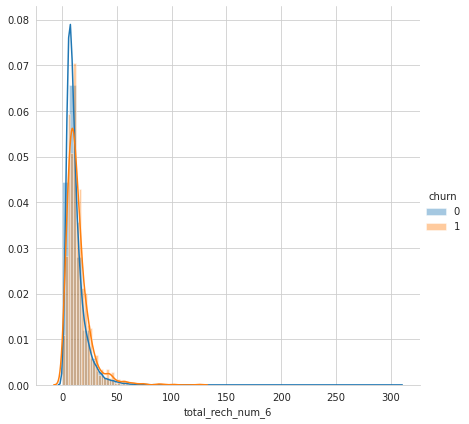

In [38]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_num_6").add_legend()

#its difficult to know about the churning rate based on total_rech_num_6 feature as overlaped data.

In [39]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_7"]))
print(np.mean(df_churn["total_rech_num_7"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_7"]))
print(np.median(df_churn["total_rech_num_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_7"],np.arange(0,100,25)))

Mean:
11.875464545859968
13.43170426065163
median:
9.0
10.0
Quantiles:
[ 0.  6.  9. 15.]
[ 0.  7. 10. 17.]


/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


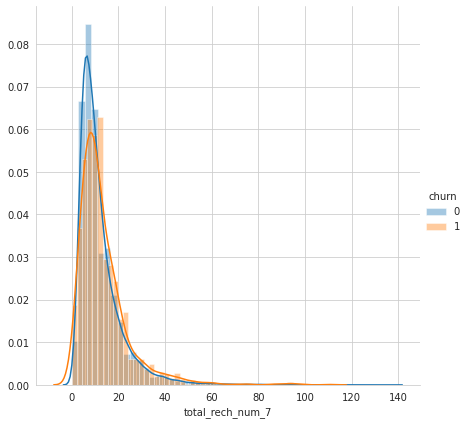

In [40]:
#feature importance of total_rech_data_7
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.set_style('whitegrid')
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_num_7").add_legend()

#its difficult to know about the churning rate based on total_rech_data_7 feature as overlaped data.

In [41]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_num_8"]))
print(np.mean(df_churn["total_rech_num_8"]))
print("median:")
print(np.median(df_not_churn["total_rech_num_8"]))
print(np.median(df_churn["total_rech_num_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_num_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_num_8"],np.arange(0,100,25)))

Mean:
10.523561766017542
7.021303258145363
median:
8.0
5.0
Quantiles:
[ 0.  5.  8. 13.]
[0. 3. 5. 9.]


/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


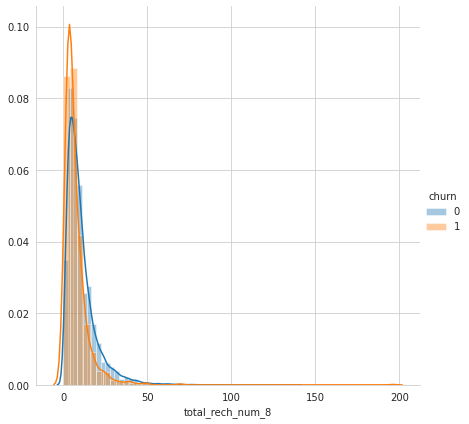

In [42]:
#feature importance of total_rech_amt_8
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_num_8").add_legend()

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


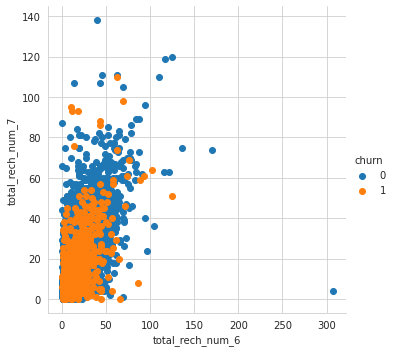

In [43]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_7").add_legend()

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


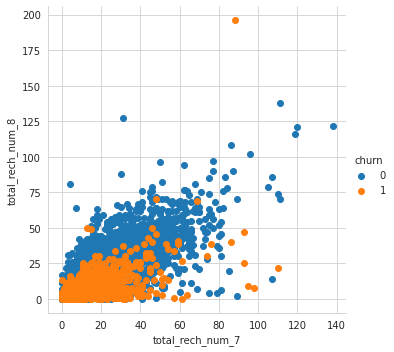

In [44]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_num_7","total_rech_num_8").add_legend()

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


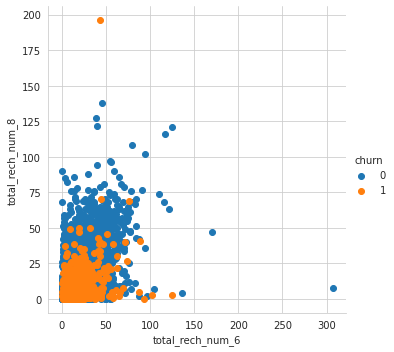

In [45]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_8").add_legend()

### Univariate Analysis on 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',

In [46]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_6"]))
print(np.mean(df_churn["total_rech_amt_6"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_6"]))
print(np.median(df_churn["total_rech_amt_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_6"],np.arange(0,100,25)))

Mean:
656.1418537237996
786.3007518796992
median:
564.0
669.0
Quantiles:
[  0. 366. 564. 820.]
[  0. 450. 669. 984.]


/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


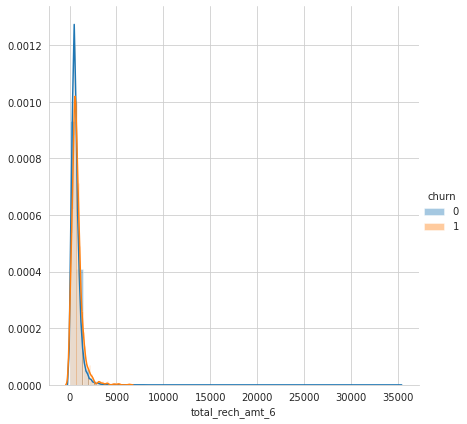

In [47]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_amt_6").add_legend()

In [48]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_7"]))
print(np.mean(df_churn["total_rech_amt_7"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_7"]))
print(np.median(df_churn["total_rech_amt_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_7"],np.arange(0,100,25)))

Mean:
668.5358257767207
733.1115288220551
median:
570.0
616.0
Quantiles:
[  0. 366. 570. 833.]
[  0.   382.75 616.   939.25]


/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


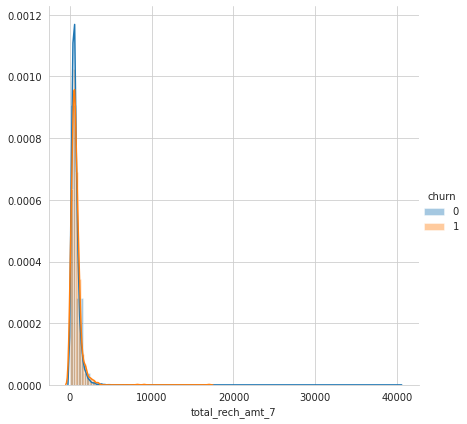

In [49]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_amt_7").add_legend()

In [50]:
print("Mean:")
print(np.mean(df_not_churn["total_rech_amt_8"]))
print(np.mean(df_churn["total_rech_amt_8"]))
print("median:")
print(np.median(df_not_churn["total_rech_amt_8"]))
print(np.median(df_churn["total_rech_amt_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["total_rech_amt_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["total_rech_amt_8"],np.arange(0,100,25)))

Mean:
619.713691095585
352.98809523809524
median:
518.0
190.0
Quantiles:
[  0. 288. 518. 800.]
[  0.    16.5  190.   506.25]


/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


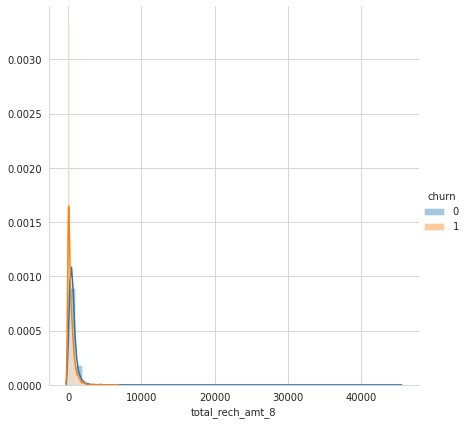

In [51]:
#feature importance of total_rech_num_6
#now use histogram or probability density function for univiraite analysis
#one variable analysis
#this is important to know feature importance in classification
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"total_rech_amt_8").add_legend()

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


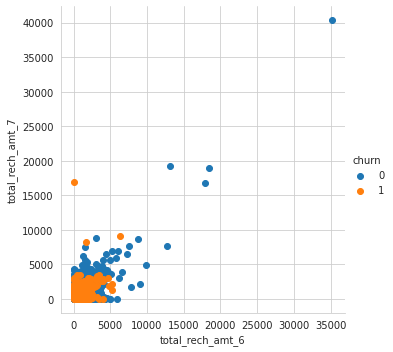

In [52]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_7").add_legend()

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


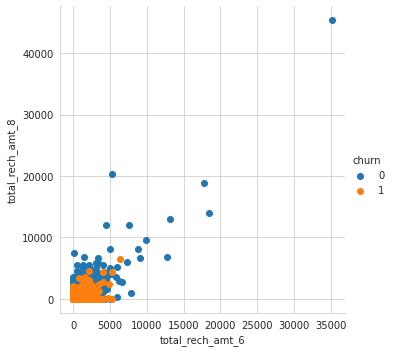

In [53]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_amt_6","total_rech_amt_8").add_legend()

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


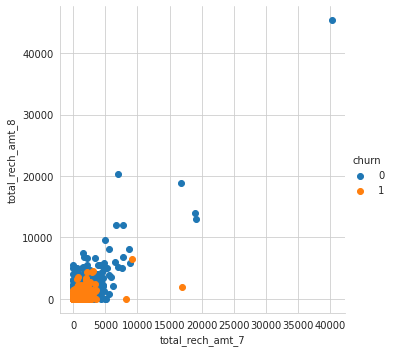

In [54]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"total_rech_amt_7","total_rech_amt_8").add_legend()

### Univariate Analysis on max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',

In [55]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_6"]))
print(np.mean(df_churn["max_rech_amt_6"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_6"]))
print(np.median(df_churn["max_rech_amt_6"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_6"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_6"],np.arange(0,100,25)))

Mean:
168.3110227441653
158.79761904761904
median:
120.0
110.0
Quantiles:
[  0. 110. 120. 200.]
[  0. 100. 110. 154.]


/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


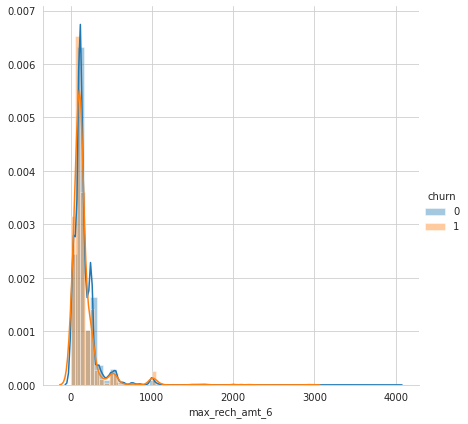

In [56]:
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"max_rech_amt_6").add_legend()

In [57]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_7"]))
print(np.mean(df_churn["max_rech_amt_7"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_7"]))
print(np.median(df_churn["max_rech_amt_7"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_7"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_7"],np.arange(0,100,25)))

Mean:
171.94440315147912
159.51629072681703
median:
130.0
110.0
Quantiles:
[  0. 110. 130. 200.]
[  0.  98. 110. 154.]


/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


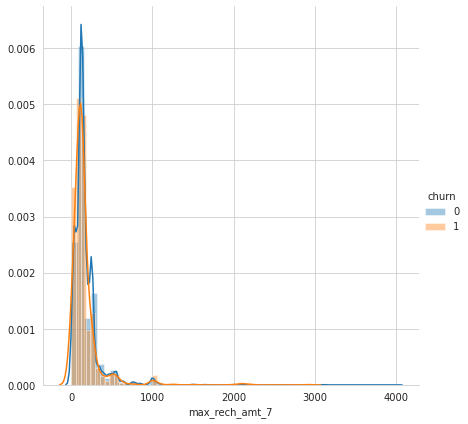

In [58]:
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"max_rech_amt_7").add_legend()

In [59]:
print("Mean:")
print(np.mean(df_not_churn["max_rech_amt_8"]))
print(np.mean(df_churn["max_rech_amt_8"]))
print("median:")
print(np.median(df_not_churn["max_rech_amt_8"]))
print(np.median(df_churn["max_rech_amt_8"]))

print("Quantiles:")
print(np.percentile(df_not_churn["max_rech_amt_8"],np.arange(0,100,25)))
print(np.percentile(df_churn["max_rech_amt_8"],np.arange(0,100,25)))

Mean:
166.4161959268619
111.0983709273183
median:
144.0
56.0
Quantiles:
[  0.  70. 144. 198.]
[  0.  10.  56. 130.]


/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


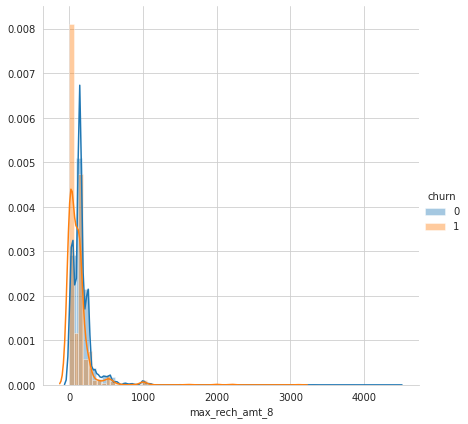

In [60]:
sns.FacetGrid(telecom,hue='churn',size=6).map(sns.distplot,"max_rech_amt_8").add_legend()

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


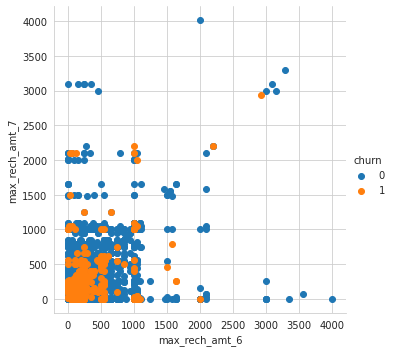

In [61]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"max_rech_amt_6","max_rech_amt_7").add_legend()

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


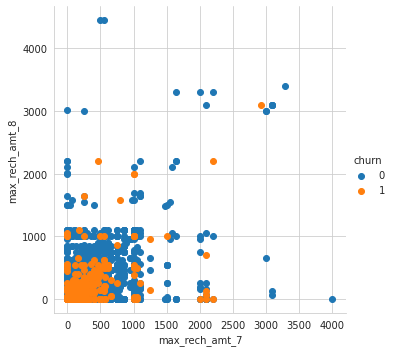

In [62]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"max_rech_amt_7","max_rech_amt_8").add_legend()

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


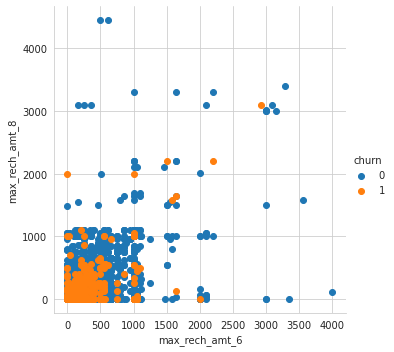

In [63]:
sns.FacetGrid(telecom,hue='churn',size=5).map(plt.scatter,"max_rech_amt_6","max_rech_amt_8").add_legend()

### Correlation Matrix: Bivariate Analysis

<AxesSubplot:>

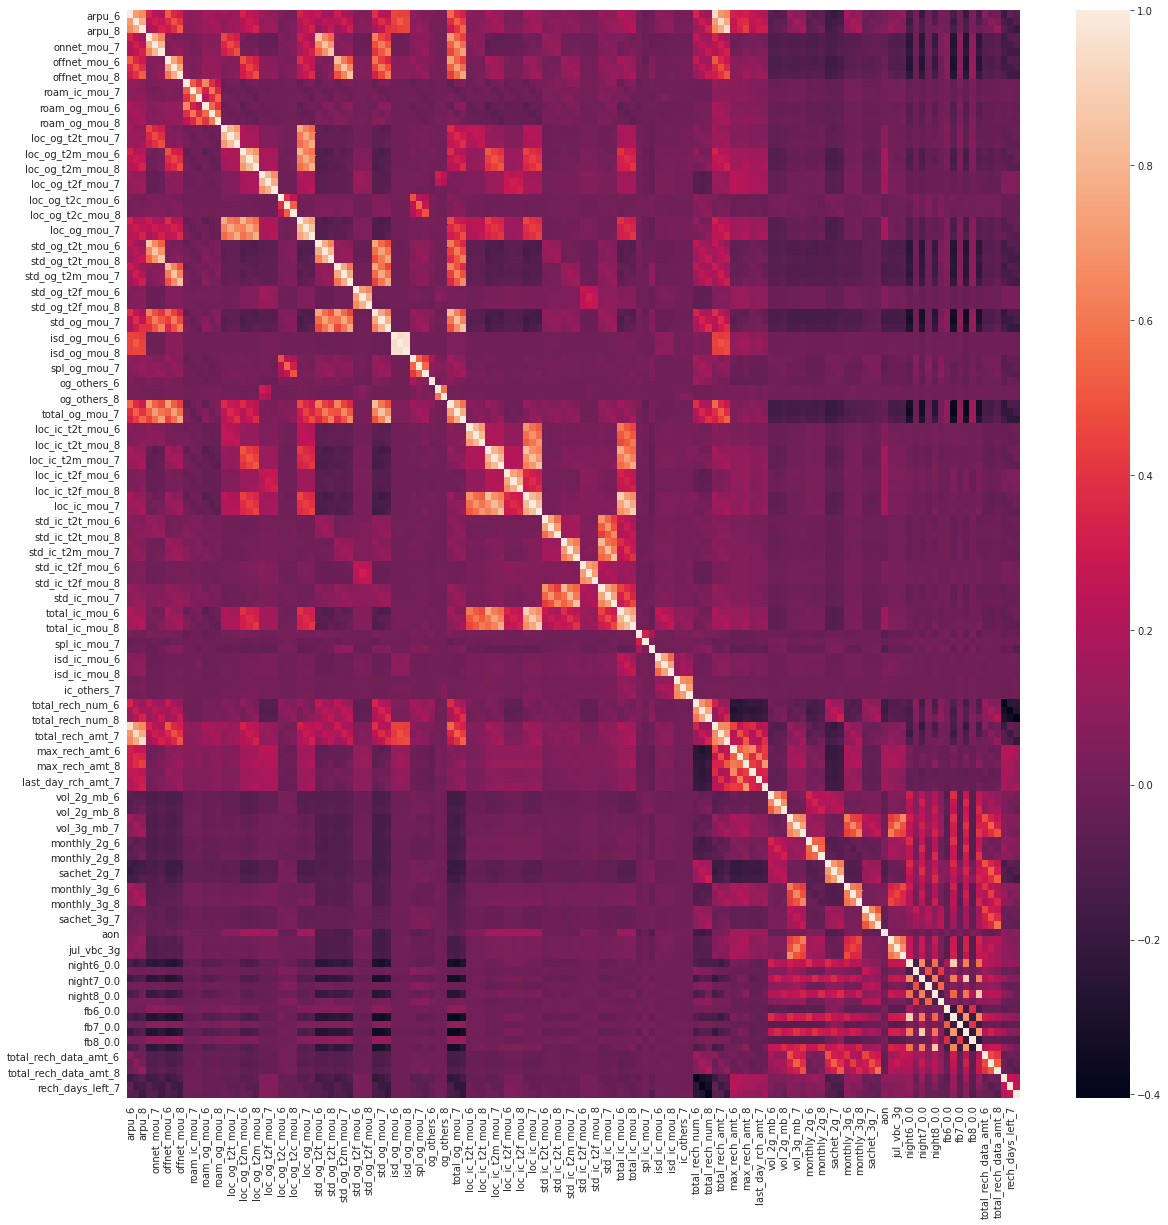

In [64]:
telecom2 = telecom.drop(['mobile_number', 'churn'], axis=1)

# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(telecom2.corr())

In [65]:
# Create correlation matrix
corr_matrix = telecom2.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.80)]

print("HIGHLY CORRELATED FEATURES IN DATA SET:{}\n\n{}".format(len(high_corr_features), high_corr_features))

HIGHLY CORRELATED FEATURES IN DATA SET:36

['onnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'fb6_1.0', 'fb7_1.0', 'fb8_1.0']


* OBSERVATION: 38 highly correlated features (> 80%) found in the data set.
* NOTE: We are not dropping these columns manually rather using feature reduction methods to do the job. We worked with RFE, LASSO and PCA.

# SUMMARY PART 2: EXPLORATORY DATA ANALYSIS (EDA)

OBSERVATIONS
1. Data is higly imbalanced only 5.6% data is churn & remaining is non_churn
2. From univariate analysis some relationship is emerging to the churn, but no clear relationship found.
3. There are many highly correlated features, found 38 features with more then 0.8 correlation.

NEXT STEPS:
1. Need to balance the data, apply suitable data-balancing method
2. Features are highly correlated, use feture reduction methods before modelling.

# PART 3: FEATURE REDUCTION USING RFE & LOGISTIC REGRESSION

In [66]:
# Load clean telecom data file
master_df = pd.read_csv('telecom_churn_data_clean.csv', low_memory=False)
master_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
0,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0.0,0.0,0.0,1,3.0,6.0,5.0
1,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,1,0,1,0.0,354.0,207.0,0,5.0,0.0,1.0
2,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,1,0,1,0.0,712.0,540.0,0,12.0,24.0,7.0
4,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,1,5285.0,20424.0,455.0,0,0.0,1.0,5.0


In [67]:
print('Dataframe Shape: ', master_df.shape)
print("Dataframe Info: \n"); master_df.info()

Dataframe Shape:  (28504, 144)
Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28504 entries, 0 to 28503
Columns: 144 entries, mobile_number to rech_days_left_8
dtypes: float64(105), int64(39)
memory usage: 31.3 MB


In [68]:
# Drop MemberID/Phone-number
telecom = master_df.drop(['mobile_number'], axis=1)

# Create X (independent variable) & y (dependent variable) 
df_telecom = telecom.drop(['churn'], axis=1)
X = telecom.drop(['churn'], axis=1)
y = telecom['churn']

In [69]:
X.shape

(28504, 142)

### Data Standardization/Normalization

In [70]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

### Split Data into Train & Test

In [71]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [72]:
print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))
print("Imbalance in Test Data: {}".format(y_test_imb))

X_train Dataframe Shape (19952, 142)
X_test Dataframe Shape (8552, 142)
Imbalance in Train Data: 0.05941698083151914
Imbalance in Test Data: 0.059071207430340555


### Balance data set by oversampling

In [79]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='auto')
X_tr,y_tr = sm.fit_resample(X_train,y_train)

In [80]:
print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (37666, 142)
y_tr Dataframe Shape (37666,)
Imbalance in Train Data: 1.0


### Feature reduction using RFE

In [81]:
# Feature reduction using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, 20)   
rfe = rfe.fit(X_tr, y_tr)

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

In [82]:
rfe_features = list(df_telecom.columns[rfe.support_])
print("Features identified by RFE for model buidling: ", rfe_features)

Features identified by RFE for model buidling:  ['arpu_8', 'loc_og_mou_8', 'std_og_mou_8', 'total_og_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon', 'rech_days_left_8']


In [83]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

### Logistic Regression Model

In [84]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1)
classifier.fit(X_rfe, y_rfe)

LogisticRegression(random_state=1)

In [85]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = classifier.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6516 1559]
 [  96  381]]


In [86]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_rfe, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      8075
           1       0.20      0.80      0.32       477

    accuracy                           0.81      8552
   macro avg       0.59      0.80      0.60      8552
weighted avg       0.94      0.81      0.86      8552



# SUMMARY PART 3: FEATURE REDUCTION USING RFE & LOGISTIC REGRESSION
OBSERVATIONS
1. Getting 81.0% accuracy 
2. Confusion matix clearly shows that the model has drawback in predicting churn as high false positives.
3. Key features obtained from RFE: 'arpu_8', 'loc_og_mou_8', 'std_og_mou_8', 'total_og_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon', 'rech_days_left_8'

NEXT STEPS:
1. Use better models that suits this problem.

In [99]:
# Copying the original dataset
telecom_orig = pd.read_csv('telecom_churn_data_clean.csv', low_memory=False)
telecom = telecom_orig.copy()
print('Dataframe Shape: ', telecom.shape)
print("Dataframe Info: \n"); telecom.info()
telecom.head(5)

Dataframe Shape:  (28504, 144)
Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28504 entries, 0 to 28503
Columns: 144 entries, mobile_number to rech_days_left_8
dtypes: float64(105), int64(39)
memory usage: 31.3 MB


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
0,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0.0,0.0,0.0,1,3.0,6.0,5.0
1,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,1,0,1,0.0,354.0,207.0,0,5.0,0.0,1.0
2,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,1,0,1,0.0,712.0,540.0,0,12.0,24.0,7.0
4,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,1,5285.0,20424.0,455.0,0,0.0,1.0,5.0


In [100]:
# Drop mobile number
telecom.drop('mobile_number', axis=1, inplace=True)

In [101]:
# Create X, y variables
X = telecom.drop(['churn'],axis=1)
y = telecom['churn']

## Applying standard scale

In [102]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)

Xscaled = scaler.transform(X)

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, train_size=0.7,random_state=42)

In [104]:
print(X_train.shape)
print(X_test.shape)

(19952, 142)
(8552, 142)


In [105]:
print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))
print("Imbalance in Test Data: {}".format(y_test_imb))

X_train Dataframe Shape (19952, 142)
X_test Dataframe Shape (8552, 142)
Imbalance in Train Data: 0.0613895095222896
Imbalance in Test Data: 0.054500616522811345


In [109]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = "auto")
X_tr,y_tr = sm.fit_resample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)
np.count_nonzero(y_tr)

(37596, 142)
(37596,)


18798

In [110]:
print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (37596, 142)
y_tr Dataframe Shape (37596,)
Imbalance in Train Data: 1.0


# Applying PCA

In [111]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)

PCA(random_state=100)

In [112]:
df_train_pca = pca.fit_transform(X_tr)
print(df_train_pca.shape)

df_test_pca = pca.transform(X_test)
print(df_test_pca.shape)

(37596, 142)
(8552, 142)


# Apply logistic regression

In [113]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9)
logsk.fit(df_train_pca, y_tr)

# Predicted probabilities
y_pred = logsk.predict(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [114]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6649 1461]
 [  80  362]]


In [115]:
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred))

LogisticRegression accuracy with PCA:  0.8198082319925164


In [116]:
pca.components_

array([[ 1.51658135e-01,  1.54928162e-01,  1.04389521e-01, ...,
        -7.18363655e-02, -5.53118791e-02, -3.35779384e-02],
       [ 8.27178282e-02,  1.12351507e-01,  1.49906297e-01, ...,
         3.24735115e-02, -1.52575292e-03, -7.25408360e-03],
       [ 4.57552757e-02,  3.95430264e-02,  4.44283928e-02, ...,
         2.80424194e-02,  4.71759360e-02,  1.35005923e-02],
       ...,
       [-8.18028495e-16,  3.35628833e-16, -3.69073701e-16, ...,
         5.03649720e-17,  3.35776692e-17,  1.86082688e-17],
       [ 1.47270785e-15, -6.38075859e-17,  2.62241496e-16, ...,
        -1.56259104e-17,  3.14795620e-17,  3.17967638e-17],
       [ 0.00000000e+00, -3.26428601e-17, -3.35099040e-17, ...,
        -8.47013969e-17,  3.38894962e-17, -4.18879862e-17]])

In [117]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,PC3,Feature
0,0.151658,0.082718,0.045755,arpu_6
1,0.154928,0.112352,0.039543,arpu_7
2,0.104390,0.149906,0.044428,arpu_8
3,0.163725,-0.059158,-0.041988,onnet_mou_6
4,0.167214,-0.040112,-0.048035,onnet_mou_7
5,0.116381,0.016519,-0.029526,onnet_mou_8
6,0.196501,0.020291,-0.012160,offnet_mou_6
7,0.196679,0.039293,-0.019582,offnet_mou_7
8,0.124050,0.082281,-0.010879,offnet_mou_8
9,0.032127,0.028115,0.335078,roam_ic_mou_6


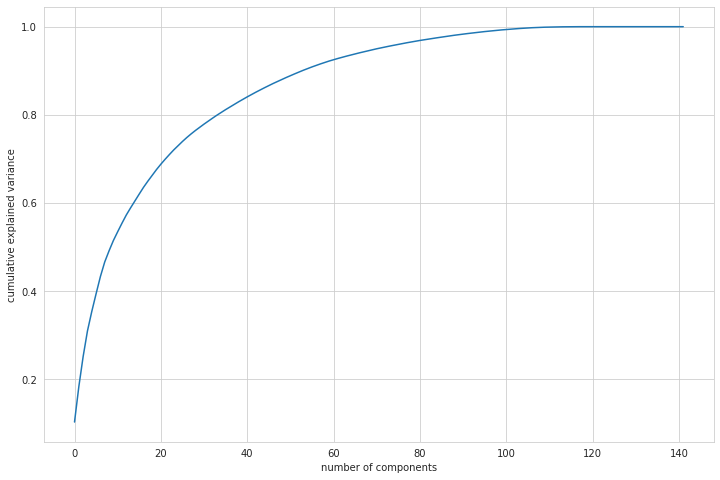

In [118]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [119]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 10.34,  18.36,  25.2 ,  31.  ,  35.41,  39.44,  43.35,  46.65,
        49.17,  51.5 ,  53.5 ,  55.44,  57.3 ,  58.93,  60.51,  62.06,
        63.59,  64.98,  66.3 ,  67.61,  68.82,  69.95,  71.03,  72.07,
        73.03,  73.97,  74.86,  75.69,  76.47,  77.21,  77.92,  78.61,
        79.29,  79.95,  80.58,  81.2 ,  81.8 ,  82.39,  82.98,  83.55,
        84.1 ,  84.65,  85.17,  85.68,  86.18,  86.67,  87.14,  87.6 ,
        88.05,  88.49,  88.92,  89.34,  89.75,  90.15,  90.53,  90.9 ,
        91.25,  91.59,  91.92,  92.24,  92.53,  92.81,  93.08,  93.34,
        93.59,  93.84,  94.08,  94.32,  94.55,  94.78,  95.  ,  95.21,
        95.42,  95.62,  95.81,  96.  ,  96.19,  96.38,  96.56,  96.73,
        96.9 ,  97.06,  97.21,  97.36,  97.51,  97.66,  97.8 ,  97.94,
        98.08,  98.21,  98.33,  98.45,  98.57,  98.69,  98.8 ,  98.91,
        99.01,  99.11,  99.21,  99.3 ,  99.38,  99.46,  99.54,  99.61,
        99.68,  99.74,  99.8 ,  99.84,  99.88,  99.91,  99.94,  99.96,
      

# Apply logistic regression with 48 columns (90% explained variance)

In [120]:
pca48 = PCA(n_components=48)

In [121]:
df_train_pca48 = pca48.fit_transform(X_tr)
print(df_train_pca48.shape)
df_test_pca48 = pca48.transform(X_test)
print(df_test_pca48.shape)

(37596, 48)
(8552, 48)


In [122]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk1 = LogisticRegression(C=1e9)
logsk1.fit(df_train_pca48, y_tr)

# Predicted probabilities
y_pred48 = logsk1.predict(df_test_pca48)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred48)

In [123]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred48))

[[6609 1501]
 [  83  359]]


In [124]:
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred48))

LogisticRegression accuracy with PCA:  0.8147801683816651


# SUMMARY PART 3: PCA with Logistic Regression

OBSERVATIONS
1. Data is higly imbalanced only 5.6% data is churn & remaining is non_churn
2. SMOTE is applied to balance data
3. 81% accuracy with default PCA
4. 90% variance can be explained with 48 columns and maintain 82% accuracy
5. Key features are arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6

NEXT STEPS:
1. Run other models with LASSO and RFE

# LASSO & DECISSION TREE

In [126]:
# Load clean telecom data file
master_df = pd.read_csv('telecom_churn_data_clean.csv', low_memory=False)
master_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
0,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0.0,0.0,0.0,1,3.0,6.0,5.0
1,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,1,0,1,0.0,354.0,207.0,0,5.0,0.0,1.0
2,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,1,0,1,0.0,712.0,540.0,0,12.0,24.0,7.0
4,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,1,5285.0,20424.0,455.0,0,0.0,1.0,5.0


In [127]:
print('Dataframe Shape: ', master_df.shape)
print("Dataframe Info: \n"); master_df.info()

Dataframe Shape:  (28504, 144)
Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28504 entries, 0 to 28503
Columns: 144 entries, mobile_number to rech_days_left_8
dtypes: float64(105), int64(39)
memory usage: 31.3 MB


In [128]:
# Drop MemberID/Phone-number
telecom = master_df.drop(['mobile_number'], axis=1)

# Create X (independent variable) & y (dependent variable) 
df_telecom = telecom.drop(['churn'], axis=1)
X = telecom.drop(['churn'], axis=1)
y = telecom['churn']

In [129]:
master_df.shape

(28504, 144)

### Data Standardization/Normalization

In [130]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

### Split Data into Train & Test

In [131]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [132]:
print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))
print("Imbalance in Test Data: {}".format(y_test_imb))

X_train Dataframe Shape (19952, 142)
X_test Dataframe Shape (8552, 142)
Imbalance in Train Data: 0.05941698083151914
Imbalance in Test Data: 0.059071207430340555


### Balance data set by oversampling

In [135]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = "auto")
X_tr,y_tr = sm.fit_resample(X_train,y_train)

In [136]:
print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (37666, 142)
y_tr Dataframe Shape (37666,)
Imbalance in Train Data: 1.0


### Feature reduction using LASSO

In [137]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(37666, 45)
[  0   1   3  10  13  14  20  23  29  34  39  40  47  49  52  53  58  65
  75  79  80  83  91  92 101 102 104 107 108 109 110 111 113 116 118 120
 121 125 128 132 135 138 139 140 141]


In [138]:
#feature vector for decision tree#feature 
lasso_features = list(df_telecom.columns[pos])
print("Features identified by LASSO for model buidling: ", lasso_features)

Features identified by LASSO for model buidling:  ['arpu_6', 'arpu_7', 'onnet_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'spl_og_mou_8', 'og_others_7', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_7', 'aon', 'aug_vbc_3g', 'night6_1.0', 'night8_0.0', 'fb7_0.0', 'fb8_1.0', 'total_rech_data_amt_8', 'rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8']


In [139]:
X_train = X_lasso
y_train = y_tr

In [140]:
print ("Feature space holds %d observations and %d features" % X_train.shape)
print ("Unique target labels:", np.unique(y_train))

Feature space holds 37666 observations and 45 features
Unique target labels: [0 1]


### Decision Tree with default hyperparameter

In [142]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [143]:
# Let's check the evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8075
           1       0.20      0.71      0.31       477

    accuracy                           0.82      8552
   macro avg       0.59      0.77      0.60      8552
weighted avg       0.94      0.82      0.87      8552



In [144]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6694 1381]
 [ 137  340]]
0.8224976613657624


### Hyperparameter Tuning

In [145]:
### Tuning max_depth
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

#instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, scoring='accuracy')

In [146]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.152154,0.005932,0.002777,0.000514,1,{'max_depth': 1},0.771967,0.802867,0.808576,0.807646,0.801274,0.798466,0.013535,39
1,0.270196,0.005670,0.002567,0.000052,2,{'max_depth': 2},0.779400,0.802867,0.805921,0.818665,0.801274,0.801625,0.012684,38
2,0.385918,0.002512,0.002616,0.000027,3,{'max_depth': 3},0.810194,0.842294,0.843489,0.837648,0.828621,0.832449,0.012294,37
3,0.499435,0.003923,0.002678,0.000108,4,{'max_depth': 4},0.847226,0.863534,0.875083,0.869242,0.868446,0.864706,0.009478,36
4,0.605205,0.003308,0.002617,0.000017,5,{'max_depth': 5},0.849084,0.878003,0.883313,0.884641,0.883977,0.875804,0.013565,35


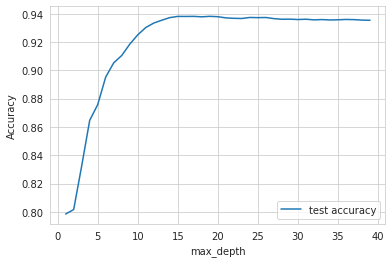

In [149]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf

In [150]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             scoring='accuracy')

In [151]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.568182,0.047817,0.003251,0.000028,5,{'min_samples_leaf': 5},0.892886,0.939334,0.947166,0.940927,0.942652,0.932593,0.020026,1
1,1.319454,0.020757,0.003270,0.000309,25,{'min_samples_leaf': 25},0.881205,0.920616,0.929510,0.930041,0.931634,0.918601,0.019091,2
2,1.227448,0.012851,0.003150,0.000136,45,{'min_samples_leaf': 45},0.870719,0.911987,0.924731,0.920616,0.920483,0.909707,0.019930,3
3,1.177219,0.020600,0.003061,0.000066,65,{'min_samples_leaf': 65},0.865012,0.908536,0.916766,0.918625,0.916102,0.905008,0.020292,4
4,1.141688,0.026876,0.003048,0.000032,85,{'min_samples_leaf': 85},0.867667,0.906014,0.916235,0.915571,0.910660,0.903229,0.018161,5


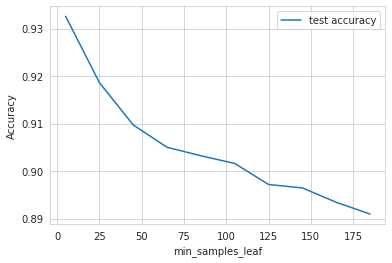

In [153]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split

In [154]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             scoring='accuracy')

In [155]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.732498,0.062724,0.003659,0.000533,5,{'min_samples_split': 5},0.890762,0.942520,0.948759,0.946900,0.947033,0.935195,0.022312,1
1,1.712099,0.060191,0.003315,0.000033,25,{'min_samples_split': 25},0.885453,0.936546,0.944245,0.936679,0.942652,0.929115,0.022050,2
2,1.694255,0.060541,0.003294,0.000019,45,{'min_samples_split': 45},0.884523,0.930174,0.938006,0.932962,0.937342,0.924601,0.020245,3
3,1.679951,0.058869,0.003281,0.000015,65,{'min_samples_split': 65},0.880542,0.928050,0.935351,0.932298,0.934687,0.922186,0.020979,4
4,1.660900,0.052314,0.003227,0.000024,85,{'min_samples_split': 85},0.878949,0.926191,0.934156,0.930705,0.932829,0.920566,0.020983,5


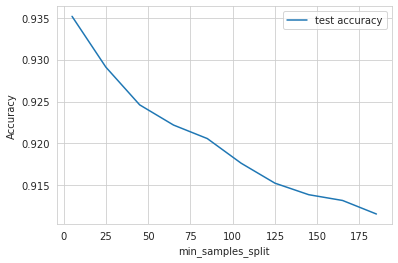

In [157]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

as increase min_samples_split, the tree overfits lesser since the model is less complex

# LASSO & DECISSION TREE
OBSERVATIONS
1. 45 features identified by LASSO for model buiding.
2. Getting around 82% accuracy 
3. Confusion matix shows lot of false positives still exist.

NEXT STEPS:
1. Try Random Forrest.

# LASSO & RANDOM FOREST

In [160]:
# Load clean telecom data file
master_df = pd.read_csv('telecom_churn_data_clean.csv', low_memory=False)
master_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
0,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0.0,0.0,0.0,1,3.0,6.0,5.0
1,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,1,0,1,0.0,354.0,207.0,0,5.0,0.0,1.0
2,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,1,0,1,0.0,712.0,540.0,0,12.0,24.0,7.0
4,7000149764,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,...,1,0,1,5285.0,20424.0,455.0,0,0.0,1.0,5.0


In [161]:
print('Dataframe Shape: ', master_df.shape)
print("Dataframe Info: \n"); master_df.info()

Dataframe Shape:  (28504, 144)
Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28504 entries, 0 to 28503
Columns: 144 entries, mobile_number to rech_days_left_8
dtypes: float64(105), int64(39)
memory usage: 31.3 MB


In [162]:
# Drop MemberID/Phone-number
telecom = master_df.drop(['mobile_number'], axis=1)

# Create X (independent variable) & y (dependent variable) 
df_telecom = telecom.drop(['churn'], axis=1)
X = telecom.drop(['churn'], axis=1)
y = telecom['churn']

In [163]:
X.shape

(28504, 142)

### Data Standardization/Normalization

In [164]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

### Split Data into Train & Test

In [165]:
# Split in train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [166]:
print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))
print("Imbalance in Test Data: {}".format(y_test_imb))

X_train Dataframe Shape (19952, 142)
X_test Dataframe Shape (8552, 142)
Imbalance in Train Data: 0.05941698083151914
Imbalance in Test Data: 0.059071207430340555


### Balance data set by oversampling

In [167]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = "auto")
X_tr,y_tr = sm.fit_resample(X_train,y_train)

In [168]:
print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (37666, 142)
y_tr Dataframe Shape (37666,)
Imbalance in Train Data: 1.0


### Feature reduction using LASSO

In [169]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(37666, 42)
[  0   1   3  10  13  14  20  23  29  34  39  40  47  49  52  53  58  65
  79  80  83  91  92  97 101 102 104 107 108 109 110 111 113 116 118 120
 121 128 135 139 140 141]


In [170]:
#feature vector for decision tree#feature 
lasso_features = list(df_telecom.columns[pos])
print("Features identified by LASSO for model buidling: ", lasso_features)

Features identified by LASSO for model buidling:  ['arpu_6', 'arpu_7', 'onnet_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'spl_og_mou_8', 'og_others_7', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_7', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_7', 'aon', 'aug_vbc_3g', 'night8_0.0', 'fb8_1.0', 'rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8']


In [171]:
X_train = X_lasso
y_train = y_tr

In [172]:
print ("Feature space holds %d observations and %d features" % X_train.shape)
print ("Unique target labels:", np.unique(y_train))

Feature space holds 37666 observations and 42 features
Unique target labels: [0 1]


### Random Forest with default hyperparameter

In [173]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [174]:
# fit
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [175]:
# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]

predictions = rfc.predict(X_test)

In [176]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8075
           1       0.50      0.56      0.53       477

    accuracy                           0.94      8552
   macro avg       0.74      0.76      0.75      8552
weighted avg       0.95      0.94      0.95      8552



In [177]:
# Printing confusion matrix
print(confusion_matrix(y_test, predictions))

[[7808  267]
 [ 211  266]]


In [178]:
print(accuracy_score(y_test, predictions))

0.9441066417212348


### Hyperparameter Tuning

### Tuning max_depth

In [179]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, scoring='accuracy')

In [180]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.917439,0.035576,0.074262,0.000508,2,{'max_depth': 2},0.839660,0.855303,0.863534,0.856498,0.845480,0.852095,0.008472,4
1,7.785514,0.026718,0.104177,0.001534,7,{'max_depth': 7},0.898991,0.918492,0.929510,0.924200,0.922474,0.918734,0.010486,3
2,11.452243,0.093079,0.137096,0.001131,12,{'max_depth': 12},0.939342,0.961370,0.965618,0.964689,0.967742,0.959752,0.010410,2
3,13.416041,0.040529,0.157169,0.002366,17,{'max_depth': 17},0.948235,0.972786,0.976769,0.974512,0.977167,0.969894,0.010945,1


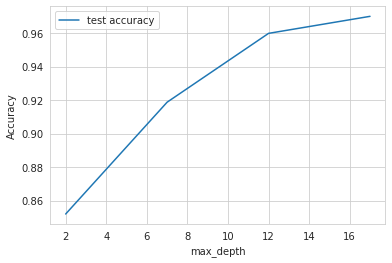

In [181]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning n_estimators

In [182]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             scoring='accuracy')

In [183]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.001571,0.069344,0.085356,0.001485,100,{'n_estimators': 100},0.860234,0.877074,0.885305,0.879198,0.876145,0.875591,0.008315,4
1,24.828620,0.103083,0.419318,0.001859,500,{'n_estimators': 500},0.860765,0.878003,0.888623,0.879995,0.877207,0.876919,0.009041,1
2,44.431854,0.148643,0.749533,0.007557,900,{'n_estimators': 900},0.860632,0.877738,0.887960,0.878534,0.875879,0.876149,0.008815,3
3,64.665735,1.580311,1.073085,0.005448,1300,{'n_estimators': 1300},0.860897,0.877207,0.887694,0.878800,0.876278,0.876175,0.008649,2


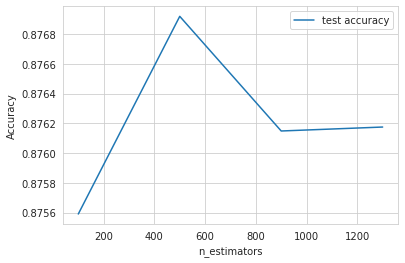

In [184]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning max_features

In [185]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24,28,32,36,40,44,48,52,56]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy")
rf.fit(X_train, y_train)

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/joblib/parallel.py", line 777, i

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/joblib/parallel.py", line 777, i

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/joblib/parallel.py", line 777, i

/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/sklearn/ensemble/_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/aditya/Upgrad/upgrad_env/lib/python3.6/site-packages/joblib/parallel.py", line 777, i

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_features': [4, 8, 14, 20, 24, 28, 32, 36, 40, 44,
                                          48, 52, 56]},
             scoring='accuracy')

In [186]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.528288,0.031284,0.083639,0.000209,4,{'max_features': 4},0.856783,0.872295,0.877340,0.878269,0.864065,0.869750,0.008211,9
1,6.203939,0.036435,0.084275,0.000599,8,{'max_features': 8},0.866207,0.878136,0.887030,0.875348,0.876145,0.876573,0.006648,6
2,10.330292,0.059616,0.083033,0.000637,14,{'max_features': 14},0.868596,0.879729,0.893933,0.886367,0.885437,0.882812,0.008424,4
3,14.417854,0.131246,0.082784,0.000665,20,{'max_features': 20},0.864083,0.890482,0.897518,0.887827,0.888491,0.885680,0.011333,3
4,17.208327,0.090827,0.082152,0.000943,24,{'max_features': 24},0.866472,0.892340,0.895659,0.894730,0.893137,0.888468,0.011059,1


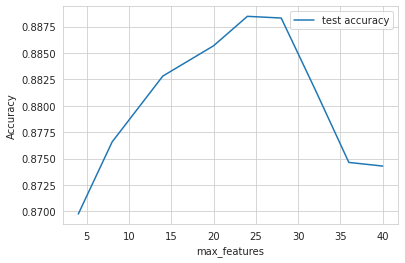

In [187]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

In [188]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10,20,30,40,50]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1,verbose = 1)

In [189]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


KeyboardInterrupt: 

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [190]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,max_depth=10,min_samples_leaf=100, min_samples_split=200,
                             max_features=10,n_estimators=100)

In [191]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)

In [ ]:
# predict
predictions = rfc.predict(X_test)

In [192]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8075
           1       0.50      0.56      0.53       477

    accuracy                           0.94      8552
   macro avg       0.74      0.76      0.75      8552
weighted avg       0.95      0.94      0.95      8552

[[7808  267]
 [ 211  266]]


#### SUMMARY: LASSO & RANDOM FOREST
OBSERVATIONS
1. Getting 94.0% accuracy 
2. Confusion matix clearly improved a lot, false positives still exist but reduced.
